In [3]:
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import json
import matplotlib.pyplot as plt
import argparse
import os

# 1. Get the coordinates of the RoI(region of interest)

This has to be handled by Dr Rowe side. Deliver Dr Rowe images with coordinates, so that he can select the area. Or you can just ask him for the area and get the coordinate by comparing the images.

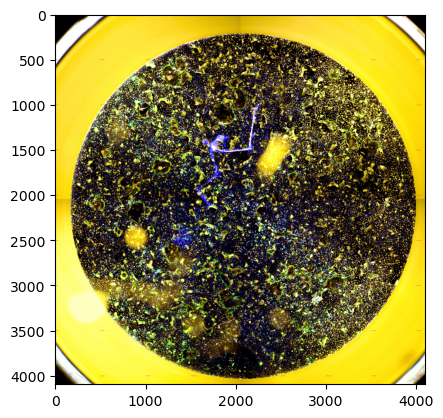

In [4]:
# Load the image
img = Image.open('Ori_image/G1 Ano_3ng RANKL_stack_adj_A.jpg')

draw = ImageDraw.Draw(img)

# Load a font
font = ImageFont.load_default()

# Draw coordinates on the image
step_size = 500  # Interval for drawing coordinates
for i in range(0, img.width, step_size):
    for j in range(0, img.height, step_size):
        text = f"({i},{j})"
        draw.text((i, j), text, fill="red", font=font)

# Save the img with coordinates
# image_with_coordinates_path = "/mnt/data/filtered_image_with_coordinates.png"
# img.save(image_with_coordinates_path)

# Display the img with coordinates
plt.figure()
plt.imshow(img)
plt.axis("on")
plt.show()

# 2. Generate Json and RoI

In [6]:
import cv2
import os
import json

# Load the WSI 
# You should save A,B,G,Y images, This can be done in your convenient way
image_path = 'Ori_image/G1 Ano_3ng RANKL_stack_adj_A.jpg'
image = cv2.imread(image_path)

if image is None:
    raise ValueError("Image not found or the path is incorrect")


REGION_SIZE = 300 # This can be changed upon Dr Rowe's need
JSON_FILENAME = 'RoI_coordinates.json'

# Example coordinates : Should be given by Dr Rowe
x_left, y_up = 500, 700

# Calculate the bottom-right coordinates
x_right = x_left + REGION_SIZE
y_low = y_up + REGION_SIZE

# Ensure the region fits within the image boundaries
height, width, _ = image.shape
if x_right > width or y_low > height:
    raise ValueError("The selected region exceeds the image boundaries")

# Extract the region
selected_region = image[y_up:y_low, x_left:x_right]

def save_region_and_update_json(image, selected_region, x_left, y_up, json_path=JSON_FILENAME):
    # Check if JSON file exists
    if os.path.exists(json_path):
        with open(json_path, 'r') as f:
            data = json.load(f)
    else:
        data = {'annotations': []}

    # Get the ID
    if data['annotations']:
        id = max([item['id'] for item in data['annotations']]) + 1
    else:
        id = 1

    # Save the selected region as an image file
    region_image_path = f'patches/{id}.jpg'
    cv2.imwrite(region_image_path, selected_region)

    # Create the new annotation
    new_annotation = {
        'id': id,
        'x_left': x_left,
        'x_right': x_left + REGION_SIZE,
        'y_up': y_up,
        'y_low': y_up + REGION_SIZE
    }

    data['annotations'].append(new_annotation)

    # Save the updated JSON file
    with open(json_path, 'w') as f:
        json.dump(data, f, indent=4)

# Call the function to save the region and update the JSON file
save_region_and_update_json(image, selected_region, x_left, y_up)
